# **🔟 Dropout in Neural Networks: How It Works & Why It's Effective 🚀🛡️🔥**

## **💡 Real-Life Analogy: Rotating Your Star Players in a Football Match ⚽️🏆**

Imagine a football coach who never relies on the same **star player** for every crucial moment.  
- Instead of playing the same players all the time (which may cause fatigue or predictability), the coach **randomly rotates** players during practice. 🔄  
- This way, the team **doesn’t become too dependent** on any one player, and **everyone gets better** overall.  
- In neural networks, **dropout** does something similar: it **randomly "drops" neurons** during training so that the network doesn’t rely too much on any single neuron. 🤹‍♂️✨

## **📌 What Is Dropout?**

✅ **Dropout** is a regularization technique used in neural networks to **prevent overfitting**.  
✅ During training, **each neuron is randomly "dropped" (set to 0) with a certain probability $ p $**.  
✅ This forces the network to learn **redundant representations** and **robust features** that work well even when some neurons are missing.

### **Mathematical Perspective:**

- Let $ z $ be the input to a layer.  
- During training, each neuron’s output is multiplied by a **binary mask** $ m $, where:  
  $$
  m \sim \text{Bernoulli}(1-p)
  $$
- The output becomes:
  $$
  \tilde{z} = m \cdot z
  $$
- At test time, **all neurons are used**, but their outputs are scaled by $ 1-p $ to maintain the expected value.

## **🔄 How Does Dropout Work?**

1️⃣ **Random Neuron Deactivation**:  
   - In each training iteration, **each neuron is independently dropped with probability $ p $**.  
   - Example: With $ p = 0.5 $, about **50% of neurons** are deactivated each time.  
2️⃣ **Preventing Co-Adaptation**:  
   - Neurons cannot rely on the presence of particular other neurons, so they **learn more robust features**.  
3️⃣ **Model Averaging**:  
   - Dropout effectively **trains an ensemble** of many subnetworks (different "thinned" networks) and averages their predictions at test time.

## **📊 Sports Examples Using Dropout with Emojis**

### **🏀 NBA Example: Player Performance Prediction**  
- **Scenario**: Predict a player’s performance (e.g., points per game) from various features.  
- **Challenge**: The network might overfit to specific players’ quirks.  
- **Dropout Effect**: By randomly dropping neurons, the model learns **general trends** rather than memorizing individual player statistics.  
- **Real-Life Insight**: It’s like rotating players so that the team performance is **not dependent on one superstar** but on a **well-rounded squad**! 🏀💪

### **⚽ Football Example: Match Outcome Prediction**  
- **Scenario**: Predict whether a team wins based on match features (e.g., shots on target, possession, opponent strength).  
- **Challenge**: Overfitting to historical matches may occur if the network memorizes idiosyncratic events.  
- **Dropout Effect**: Dropout forces the model to learn robust features that generalize to **different matches**.  
- **Real-Life Insight**: Just like a coach rotates players during games to avoid predictability, dropout makes sure the model **adapts to new game conditions**! ⚽️🔥

### **♠️ Texas Hold’em Poker Example: Strategy Prediction**  
- **Scenario**: Predict the strength of a poker hand based on previous betting actions.  
- **Challenge**: The network might overfit to rare patterns in betting behavior.  
- **Dropout Effect**: By dropping neurons, the network **generalizes better** across various playing styles.  
- **Real-Life Insight**: It’s akin to a poker player **mixing up their strategy** so opponents can’t exploit predictable patterns! ♠️🤹‍♀️

## **🛠️ Python Code Example: Using Dropout in a Neural Network for NBA Data Prediction**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [2]:
# Set seeds for reproducibility 🔒
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# -------------------------------
# Generate Synthetic NBA Performance Data 🏀✨
# -------------------------------
def generate_nba_data(n_games=82):
    """
    Simulates an NBA player's points per game over a season (82 games).
    Includes a trend and random noise.
    """
    base_trend = np.linspace(15, 30, n_games)  # Improves from 15 to 30 points
    noise = np.random.normal(0, 2, n_games)      # Random noise
    performance = base_trend + noise
    return performance

In [4]:
# Prepare sequential data: Use previous 40 games to predict next game
def create_sequences(data, seq_length=40):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(data[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

In [5]:
# Generate data for one season
n_games = 82
points = generate_nba_data(n_games)
# Normalize data between 0 and 1 for neural network training
min_pts, max_pts = points.min(), points.max()
points_norm = (points - min_pts) / (max_pts - min_pts)

In [6]:
seq_length = 40
X_seq, y_seq = create_sequences(points_norm, seq_length)
X_seq = X_seq.reshape(-1, seq_length, 1)  # Reshape for RNN input

In [7]:
# Split into training and testing sets
split_idx = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]


In [8]:
# -------------------------------
# Build a Neural Network Model with Dropout 🏀💥
# -------------------------------
model = Sequential(name="NBA_Performance_Model")
model.add(SimpleRNN(16, activation='tanh', input_shape=(seq_length, 1)))
# Add Dropout to prevent overfitting 🤖🚫
model.add(Dropout(0.5))  # Drop 50% of the neurons randomly
model.add(Dense(1, activation='sigmoid'))  # Predict normalized points

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
model.summary()

/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "NBA_Performance_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# -------------------------------
# Train the Model and Visualize Metrics 📈🎨
# -------------------------------
history = model.fit(X_train, y_train, epochs=250, batch_size=8, validation_split=0.1, verbose=1)

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0523 - mae: 0.1919 - val_loss: 0.0650 - val_mae: 0.2483
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0183 - mae: 0.1046 - val_loss: 0.0443 - val_mae: 0.1972
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0190 - mae: 0.1046 - val_loss: 0.0405 - val_mae: 0.1859
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0188 - mae: 0.1132 - val_loss: 0.0409 - val_mae: 0.1873
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0159 - mae: 0.0980 - val_loss: 0.0363 - val_mae: 0.1749
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0103 - mae: 0.0833 - val_loss: 0.0338 - val_mae: 0.1681
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0147 - mae: 0.1035 - val_loss: 0.0269 - val_mae: 0.1450
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mae: 0.0982 - val_loss: 0.0220 - val_mae: 0.1266
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125 - mae: 0.0879 -

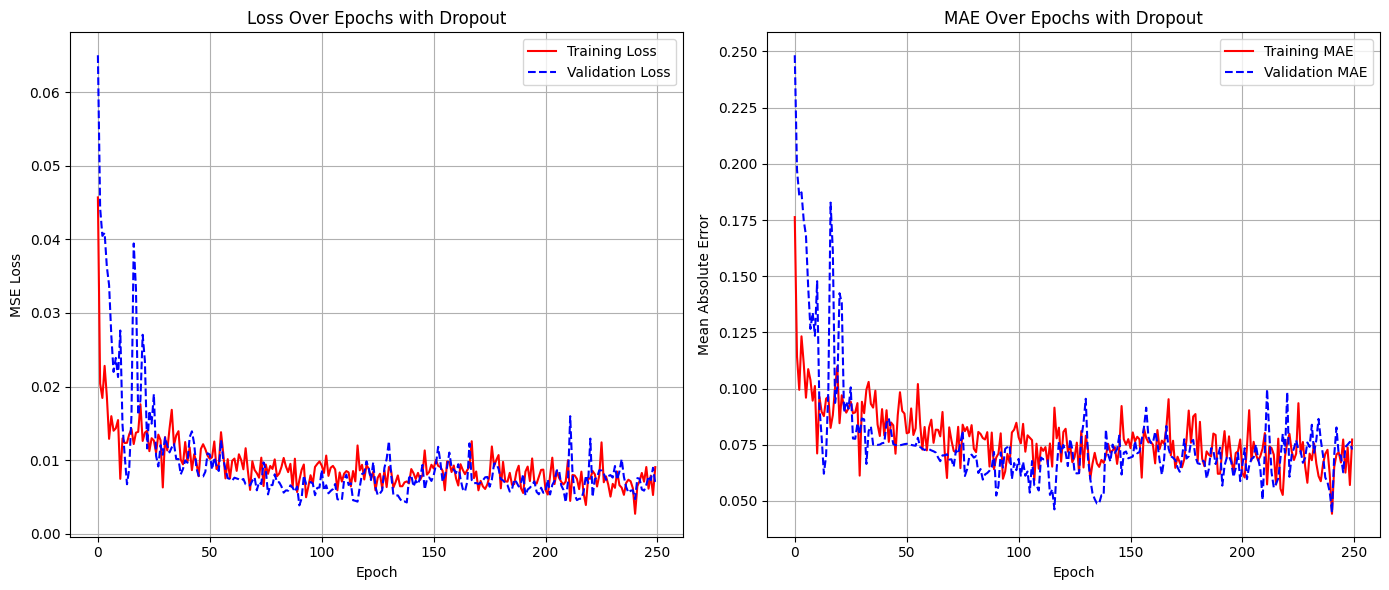

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r-', label="Training Loss")
plt.plot(history.history['val_loss'], 'b--', label="Validation Loss")
plt.title("Loss Over Epochs with Dropout")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['mae'], 'r-', label="Training MAE")
plt.plot(history.history['val_mae'], 'b--', label="Validation MAE")
plt.title("MAE Over Epochs with Dropout")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# -------------------------------
# Evaluate the Model and Plot Predictions 📊🤩
# -------------------------------
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f} | Test MAE: {mae:.4f}")

# Generate predictions on the test set
predictions = model.predict(X_test).flatten()

# Denormalize predictions for interpretability
predictions_denorm = predictions * (max_pts - min_pts) + min_pts
y_test_denorm = y_test * (max_pts - min_pts) + min_pts

display(predictions_denorm)
display(y_test_denorm)

Test Loss: 0.0248 | Test MAE: 0.1318
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([28.06133505, 29.00629042, 27.37908541, 28.6380822 , 28.29600112,
       28.38746332, 28.85153169, 27.84679147, 28.50790636])

array([31.64780583, 23.4642135 , 30.5326939 , 29.24816821, 28.66124456,
       29.627966  , 25.6544918 , 29.37547104, 30.71422514])

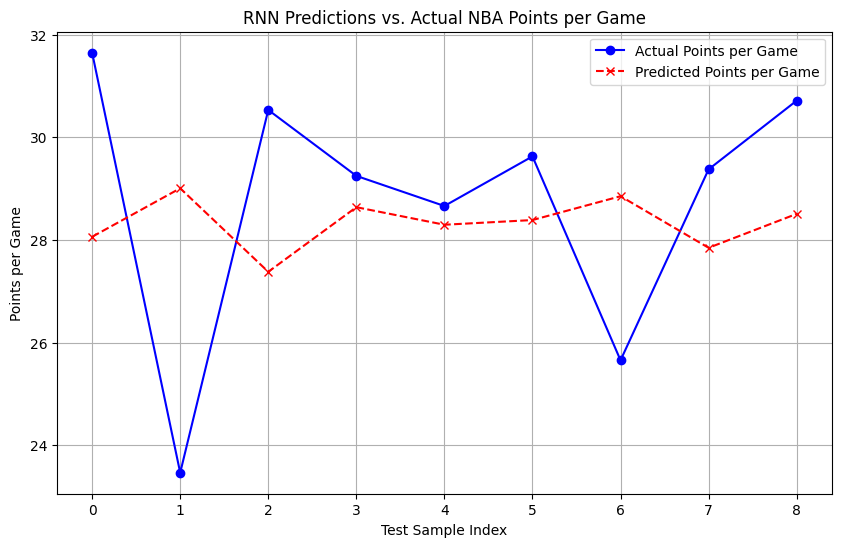

In [12]:
plt.figure(figsize=(10,6))
plt.plot(y_test_denorm, 'b-', marker='o', label="Actual Points per Game")
plt.plot(predictions_denorm, 'r--', marker='x', label="Predicted Points per Game")
plt.title("RNN Predictions vs. Actual NBA Points per Game")
plt.xlabel("Test Sample Index")
plt.ylabel("Points per Game")
plt.legend()
plt.grid(True)
plt.show()

## **🚀 Why Is Dropout Effective?**

- **Prevents Overfitting**: By randomly dropping neurons during training, the model is forced to learn **redundant representations** and **generalizable features**. 🛡️  
- **Improves Robustness**: The network becomes less sensitive to the specific weights of individual neurons, similar to a sports team that can perform well even if a key player is absent. 🤹‍♂️  
- **Acts as Model Averaging**: Dropout approximates training an **ensemble of different subnetworks** and averaging their outputs at test time, which often yields better performance. 🌟

## **🔥 Final Takeaways**

1. **Dropout** randomly deactivates neurons during training to **prevent over-reliance** on any single neuron. 🚫🤖  
2. It **improves generalization** and reduces overfitting, much like rotating players in sports to ensure a well-rounded team. ⚽️🏀♠️  
3. **Effective in both ML and DL models**, especially in deep networks where overfitting is a major concern. 💡🔥  
4. Our **Python code** example demonstrates a practical application in NBA performance prediction with rich visualizations 🎉📈🏆